# Seaborn

# Distribution Plots

In [101]:
import seaborn as sns
%matplotlib inline

In [102]:
tips=sns.load_dataset('tips') #tips is a built in data set

In [103]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

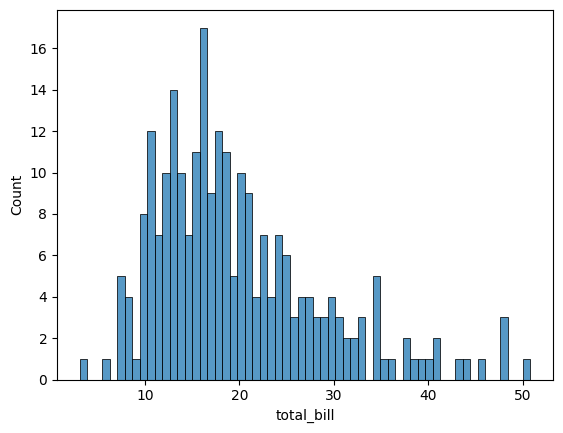

In [104]:
sns.histplot(tips['total_bill'],bins=60)

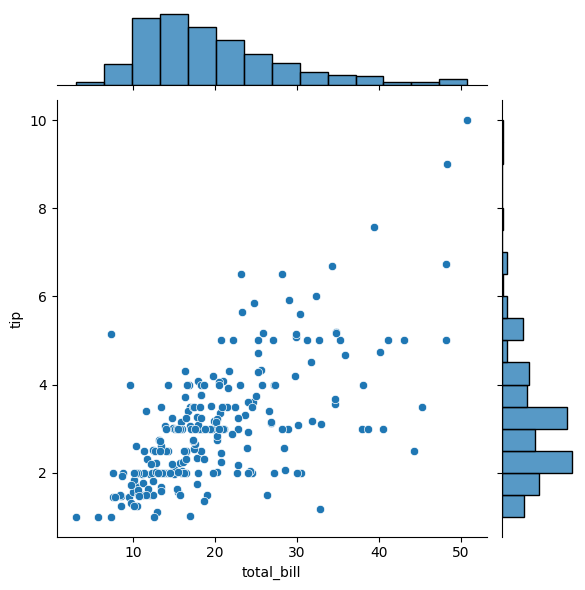

In [105]:
sns.jointplot(x='total_bill',y='tip',data=tips)
#There is a plot formed between the histplot of x and y
# By default it is scatter plot but we can change it

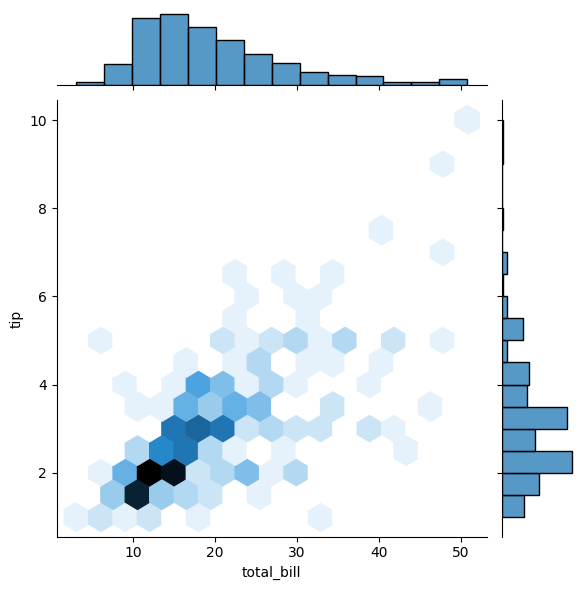

In [106]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
# More points in a hexagon, darker it is and vice versa

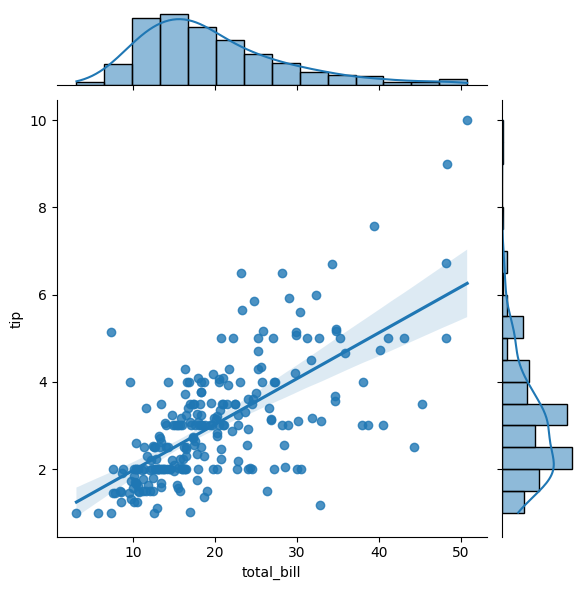

In [107]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

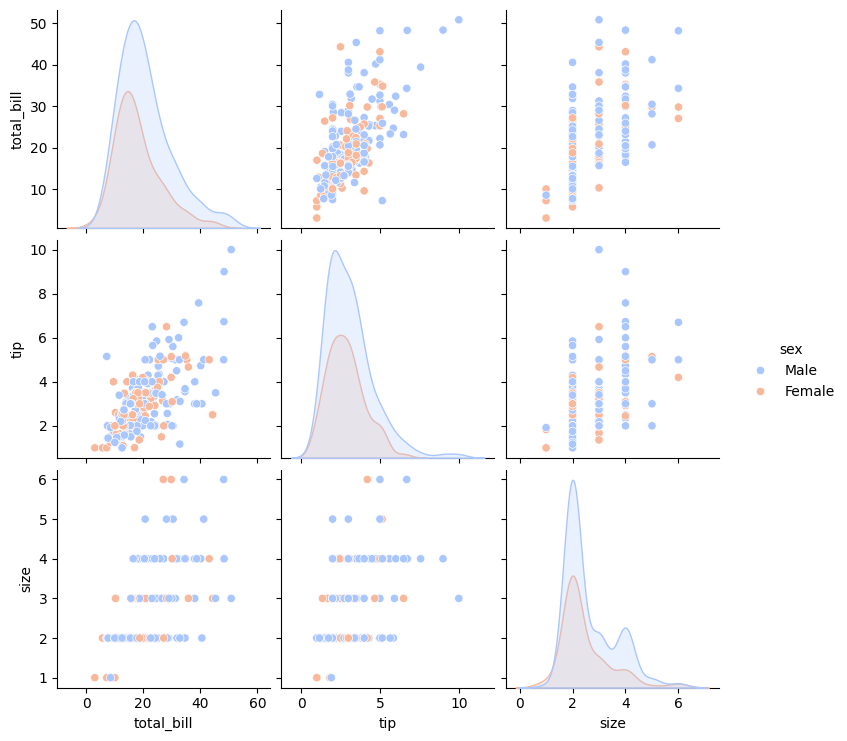

In [108]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#instead of comparing just two plots like jointplot, a pairplot compares all the columns in a dataset
# so we need to input only the dataset

# hue is for categorical column where there is a category like male,female,etc 
# thus it compaers the dits in different colours for male and female

# palette is for coloring the graphs

<Axes: xlabel='total_bill'>

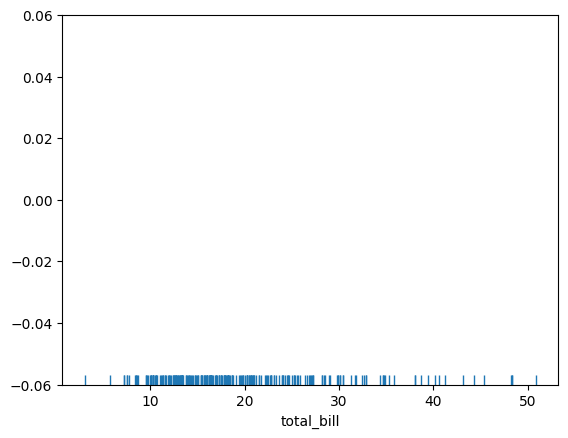

In [109]:
sns.rugplot(tips['total_bill'])

In [110]:
# Each line above will have a maxima directly above it and half a wavelength around it

# It is possible that the waves may overlap each other

# For example there will be code copy pasted from the noetbook which we dont need to understand but just look at their resulting plots 
# and see how kde plot is formed

(0.0, 1.0)

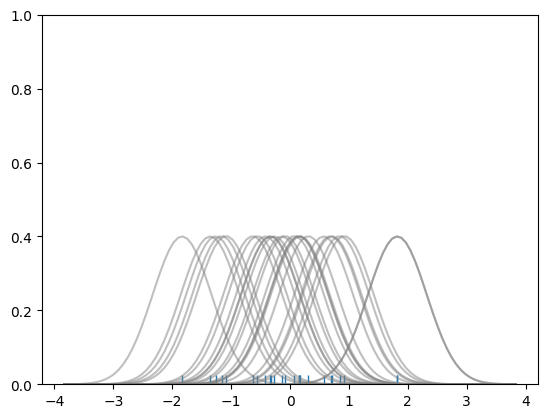

In [111]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

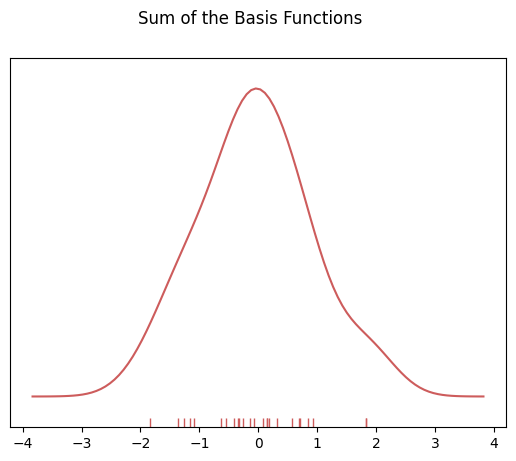

In [112]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

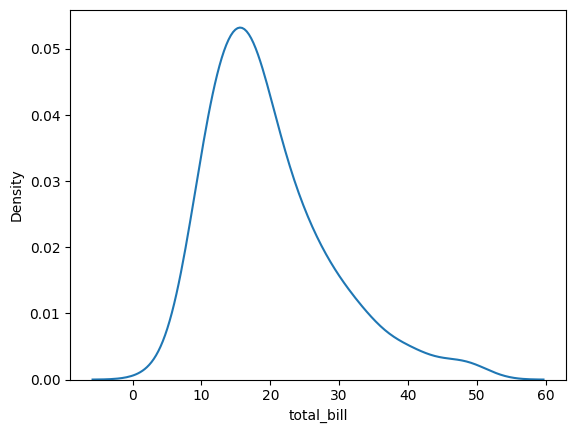

In [113]:
sns.kdeplot(tips['total_bill'])

# Categorical Plots

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [115]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

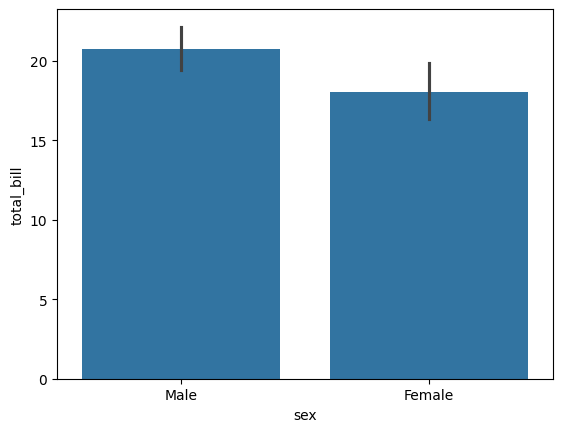

In [116]:
sns.barplot(x='sex',y='total_bill',data=tips)
# By default we will get mean of the values

<Axes: xlabel='sex', ylabel='total_bill'>

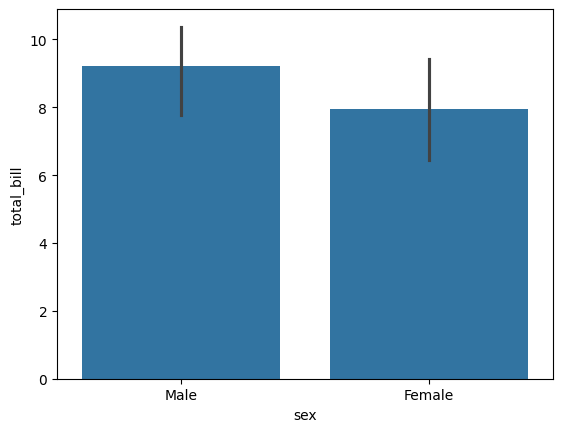

In [117]:
# We can use estimator to get plots based on different values

sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
# this estimator function gives us standard deviation

<Axes: xlabel='sex', ylabel='count'>

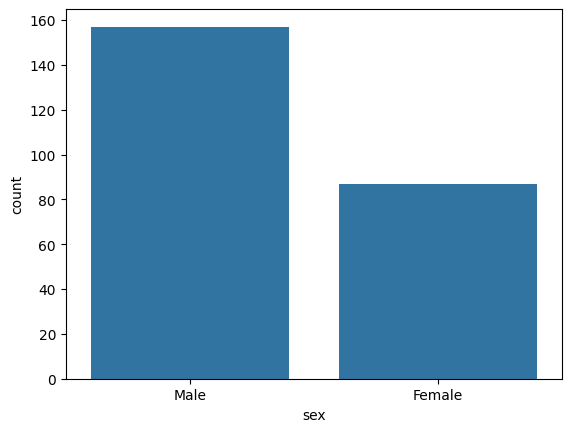

In [118]:
sns.countplot(x='sex',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

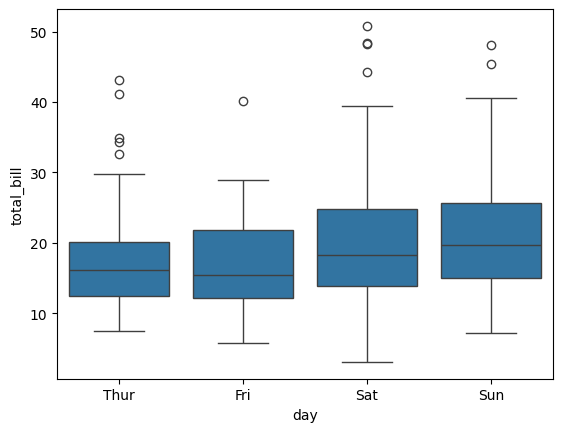

In [119]:
sns.boxplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

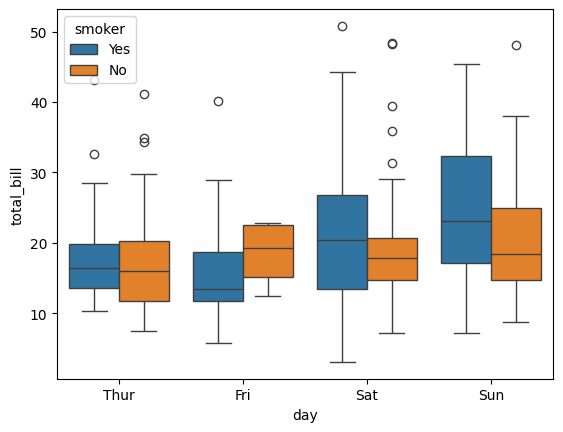

In [120]:
# we can add hue to not only compare by total bill but by any other parameter also

sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

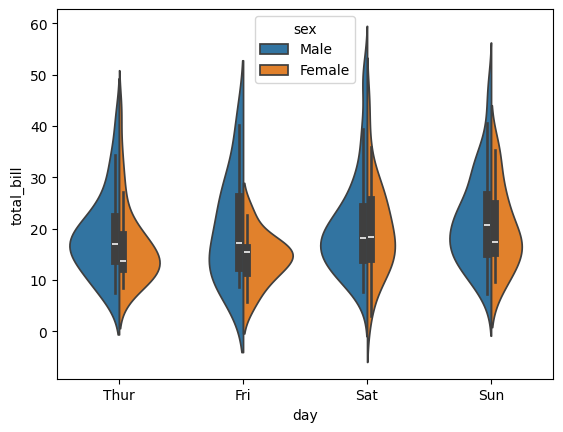

In [121]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

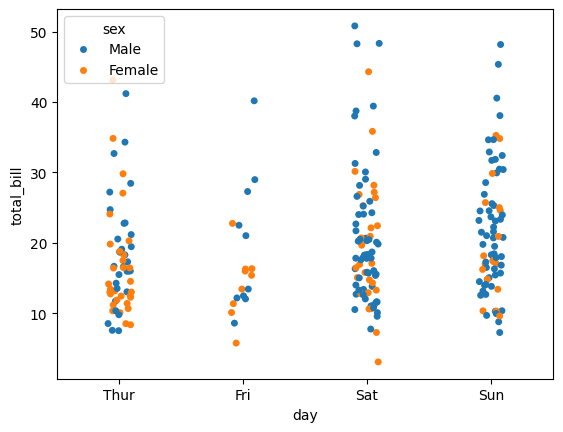

In [122]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

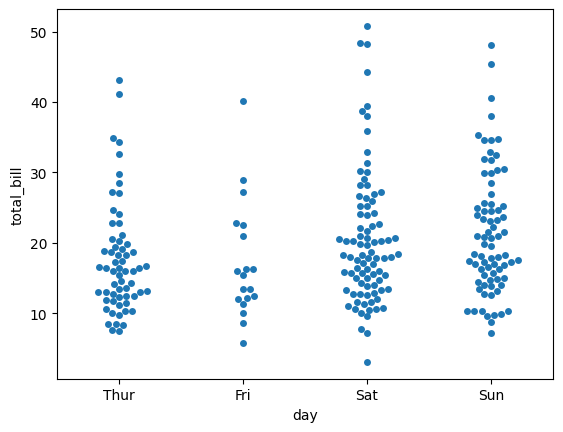

In [123]:
#  swarm plot = strip plot+violin plot
sns.swarmplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

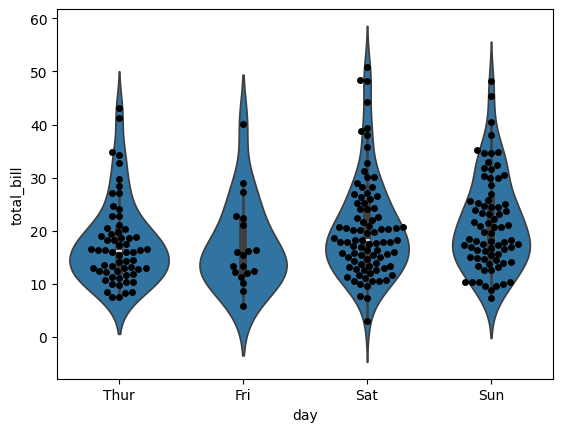

In [124]:
# we can combine swarmplots with violin plots too
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

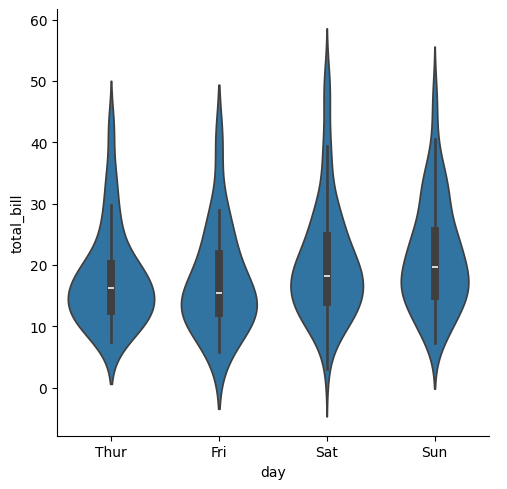

In [125]:
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')
# catplot can be used to call any other plot

# Matrix Plots

In [126]:
import seaborn as sns
%matplotlib inline
tips=sns.load_dataset('tips')
flights=sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [127]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [128]:
# Heat Map
# For heat map we need variables on both axes
# We can create the correlation table as an input to heatmap

# A correlation data takes variables that can be compared and makes a matrix of their ratios
tc=tips.corr(numeric_only=True)

<Axes: >

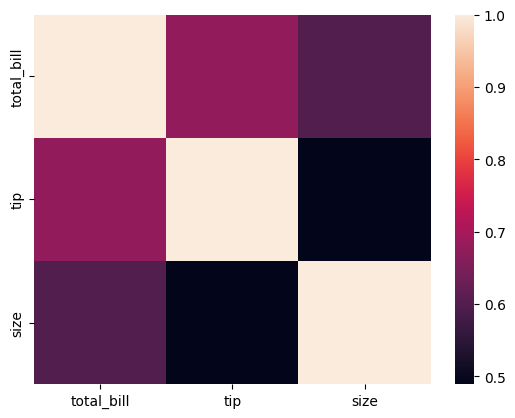

In [129]:
sns.heatmap(tc)
# All that a heatmap will do is color grade the ratios

<Axes: >

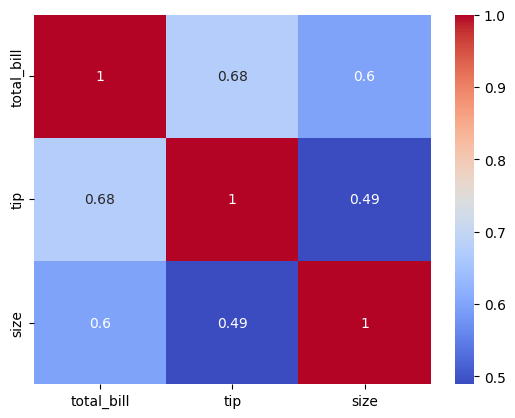

In [130]:
# We can use annot=True to show the ratios and use cmap='(color of choice)' to give our specified color
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [131]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [132]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

C:\Users\Sayuj Gupta\AppData\Local\Temp\ipykernel_29824\2534965686.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fp=flights.pivot_table(index='month',columns='year',values='passengers')


<Axes: xlabel='year', ylabel='month'>

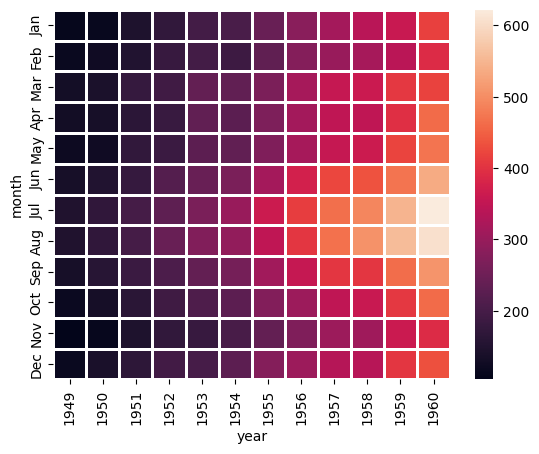

In [133]:
sns.heatmap(fp,linecolor='white',linewidth=1)
# Linecolor changes the color of boundary between two cells
# linewidth adjusts the thickness of that boundary

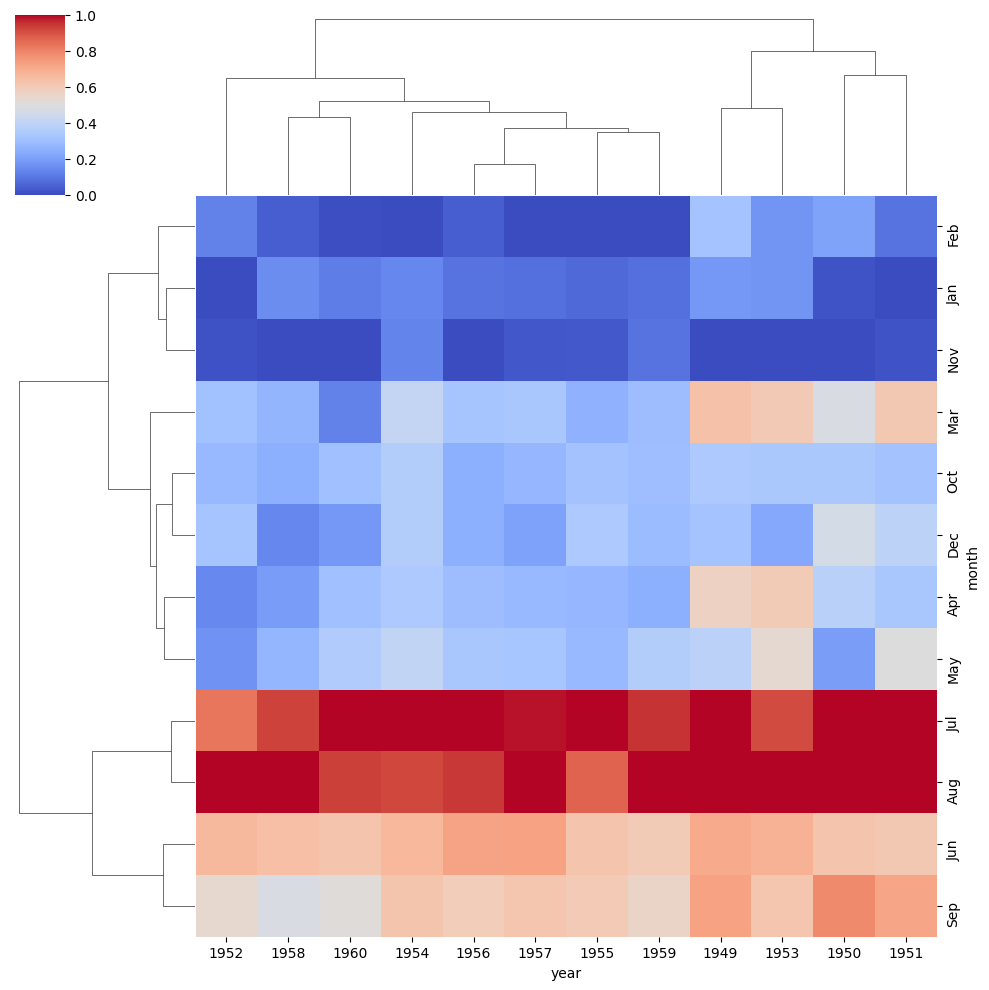

In [134]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)
#  It performs hierarchical clustering on rows and columns of the haetmap, grouping similar rows and columns together based on their values

# Grids

In [135]:
import seaborn as sns
%matplotlib inline
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

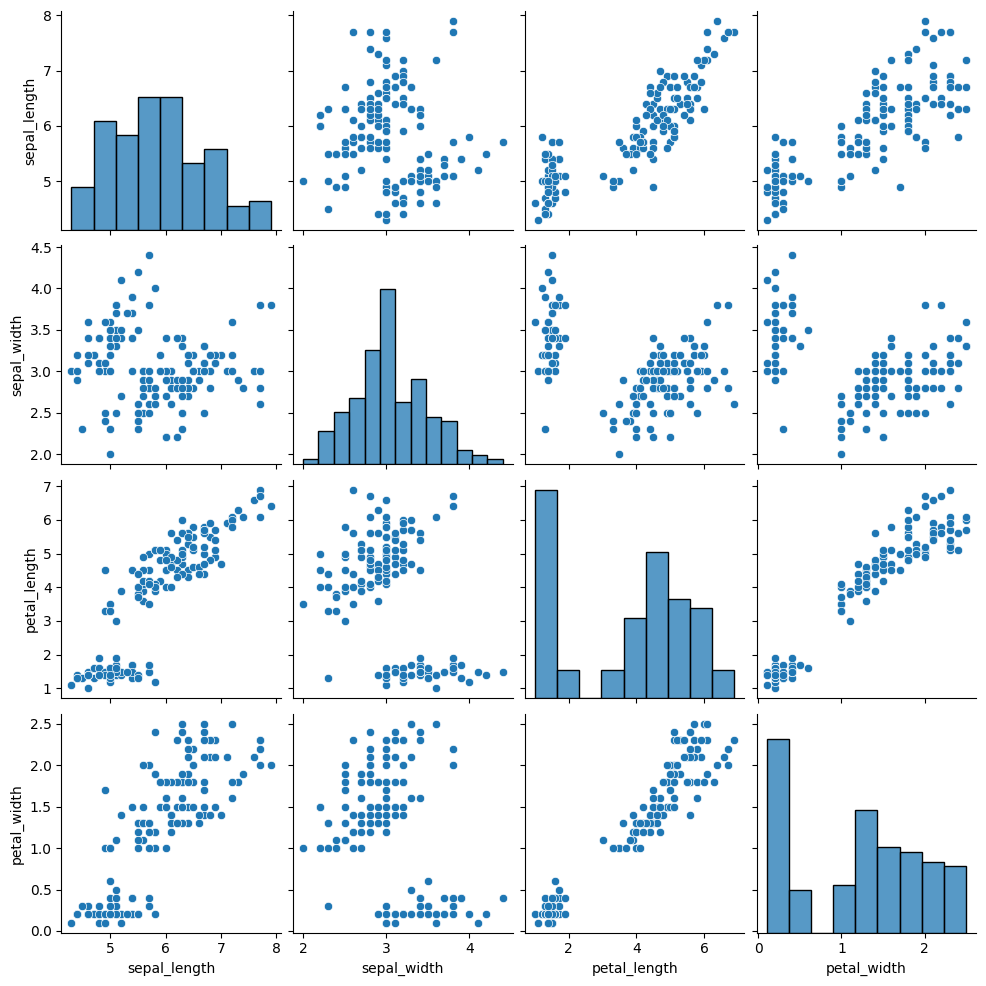

In [137]:
sns.pairplot(iris)

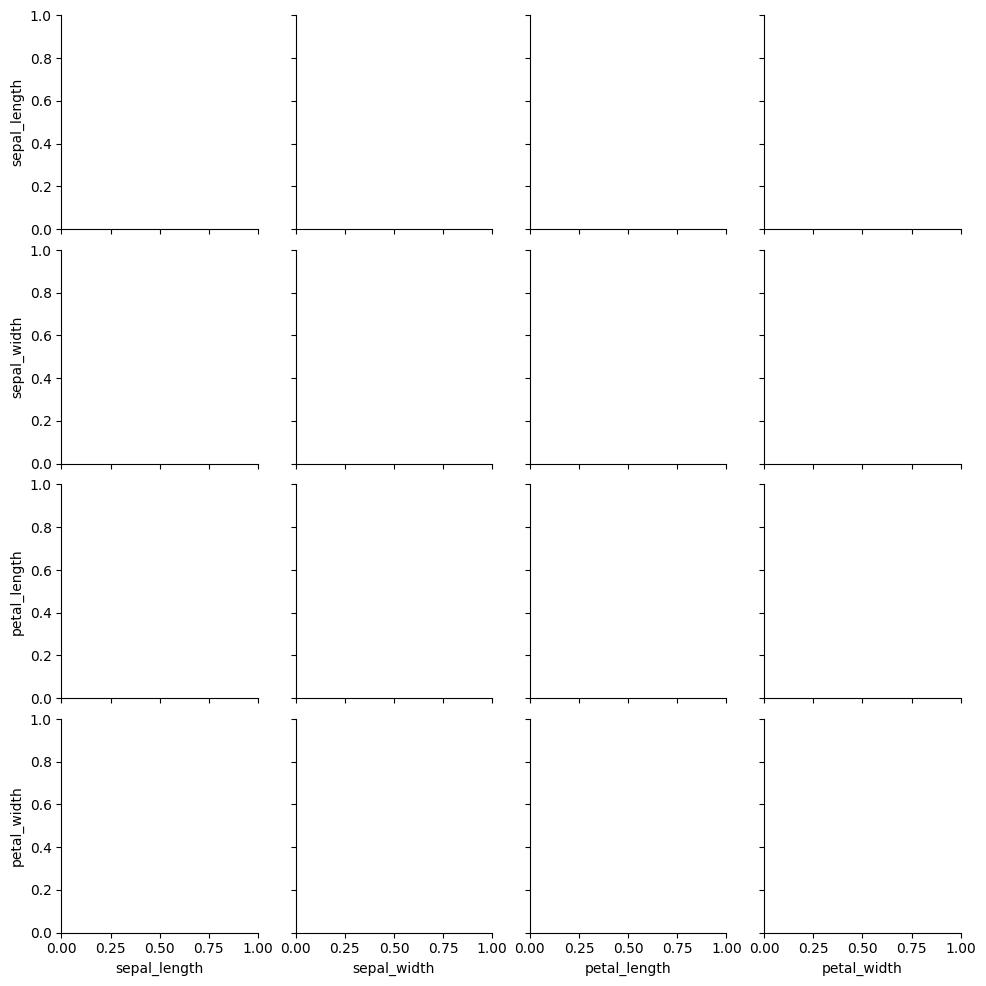

In [138]:
sns.PairGrid(iris)
# PairGrid gives a blank canvas of pairplot
# We have to do a little more work in pairgrid but we have a lot more control than pairplot

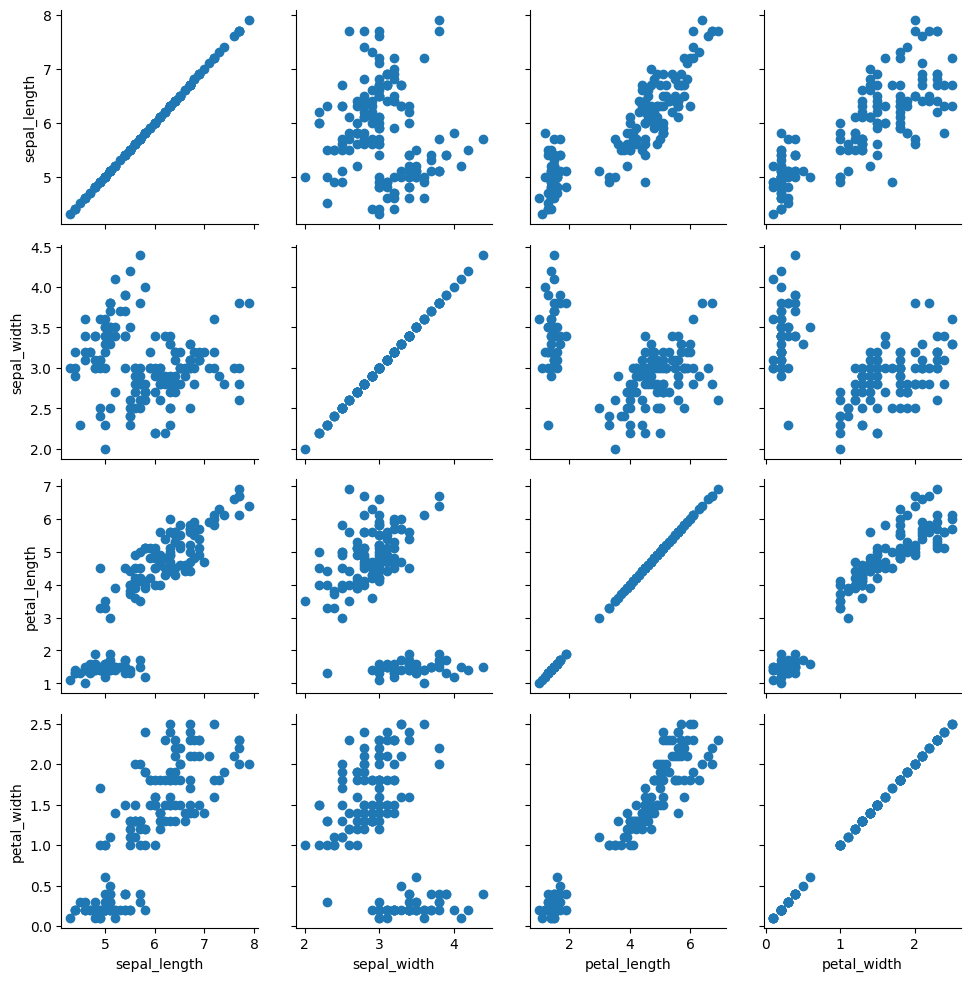

In [139]:
g=sns.PairGrid(iris)
g.map(plt.scatter)

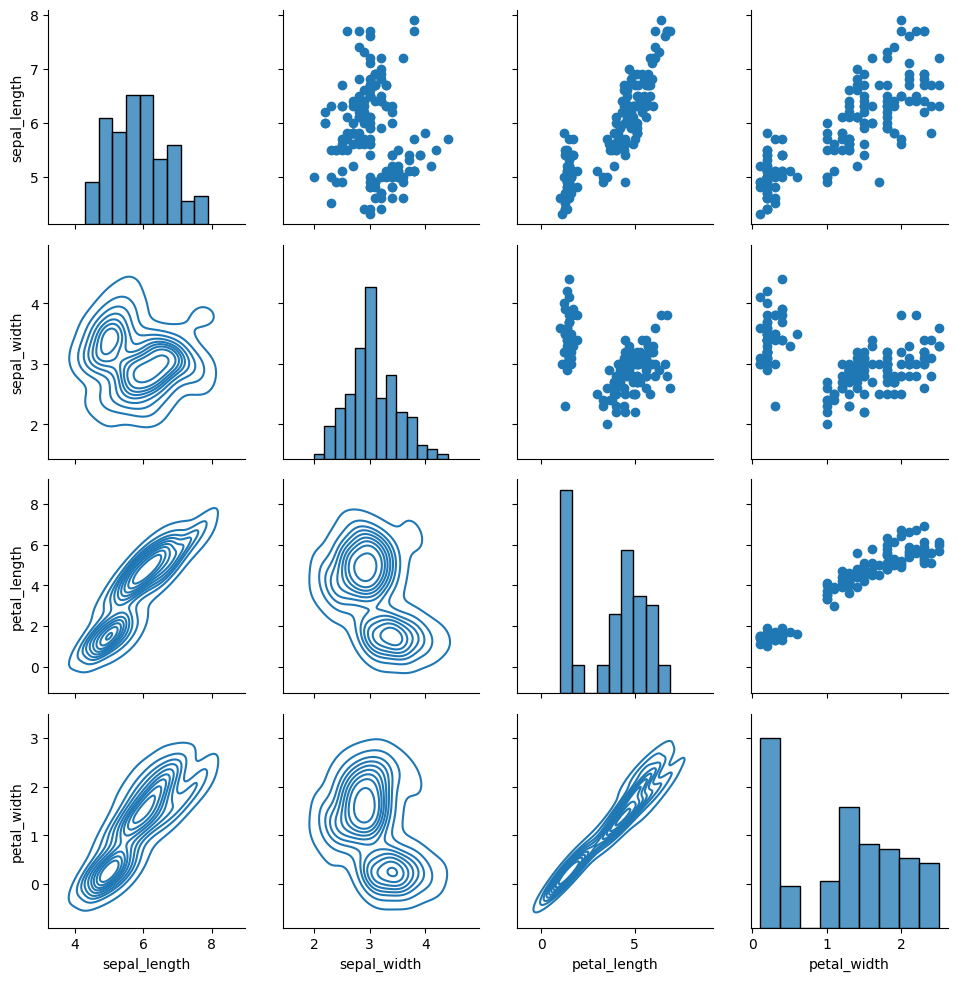

In [140]:
g=sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


In [141]:
tips=sns.load_dataset('tips')

In [142]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


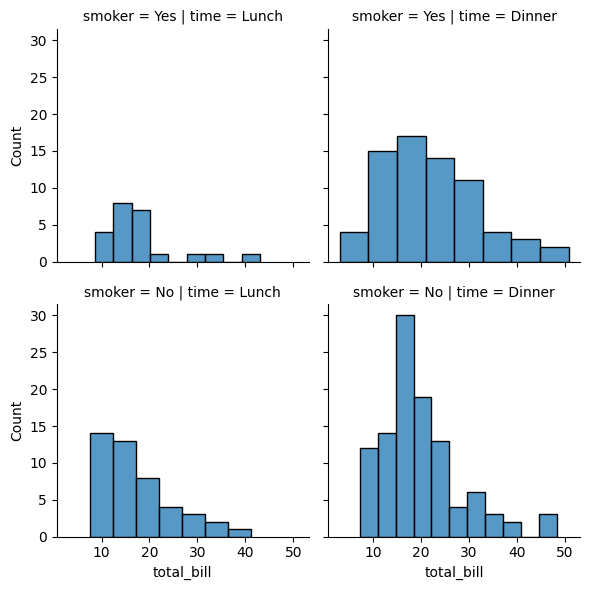

In [143]:
g=sns.FacetGrid(data=tips,row='smoker',col='time')
g.map(sns.histplot,'total_bill')

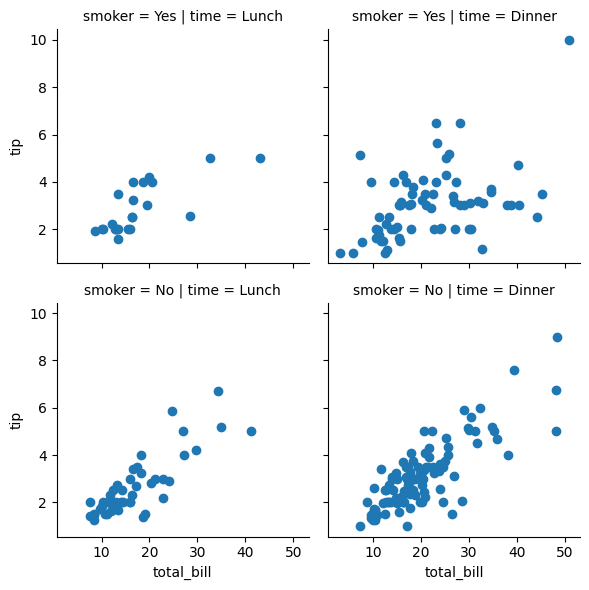

In [144]:
g=sns.FacetGrid(data=tips,row='smoker',col='time')

g.map(plt.scatter,'total_bill','tip')

# Regression Plots

In [145]:
tips=sns.load_dataset('tips')

In [146]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


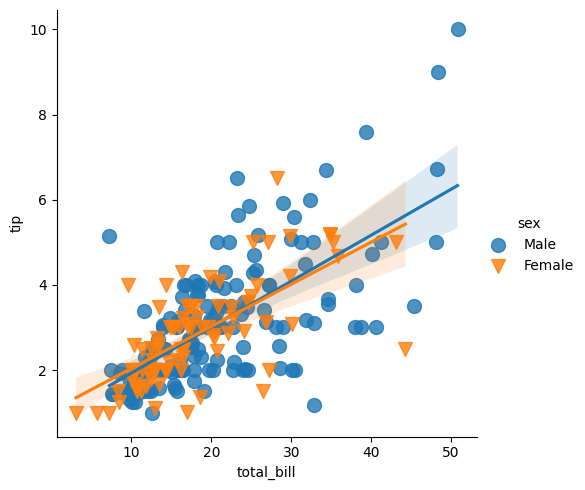

In [151]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})
# Seaborn libraries call matplotlib under the hood
# that's why we can change the size of the markers by calling scatter_kws and inputting a dictionary of matplotlib commands
# in this case, 's':100 sets the size of markers to 100


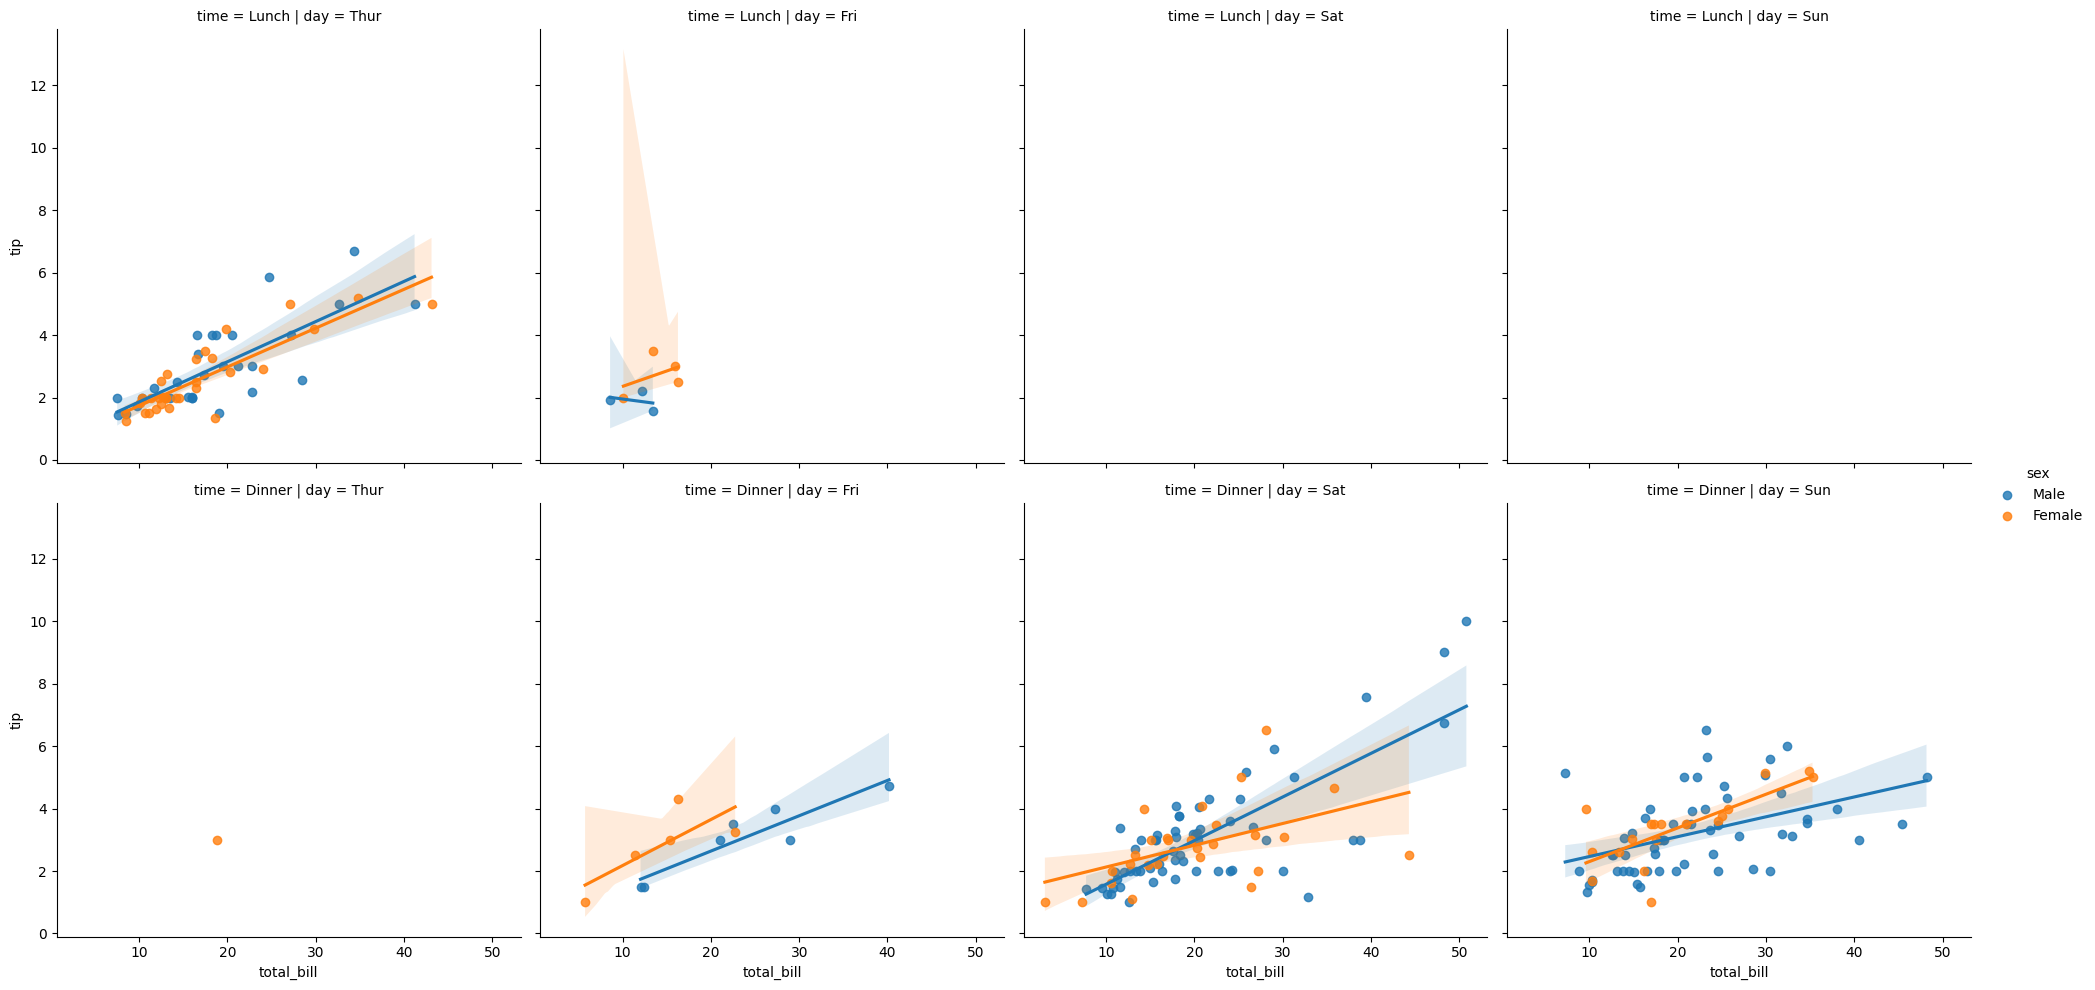

In [152]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex')

# Style and Color

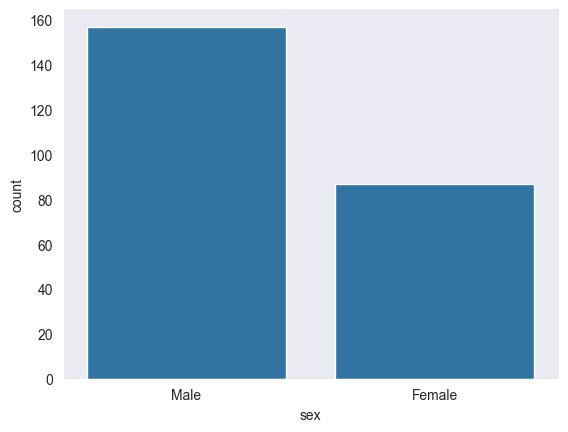

In [160]:
sns.set_style('dark') #check other styles such as 'white','dark','ticks','darkgrid',etc
sns.countplot(x='sex',data=tips)
# To remove the spine that is the upper and right boundary of graph, use this:
sns.despine()# By default this is for top ans right
# for left and bottom, we can add parameters in the bracket, left=True,bottom=True

<Axes: xlabel='sex', ylabel='count'>

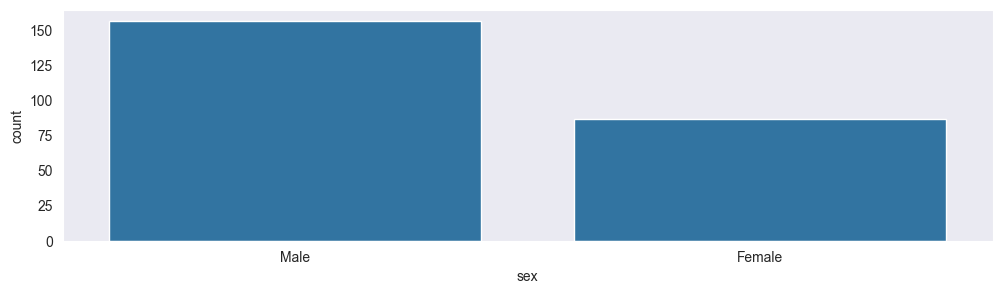

In [162]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)
#The plt i.e. the matplotlib library has overrided the size and shape of the sns library 

<Axes: xlabel='sex', ylabel='count'>

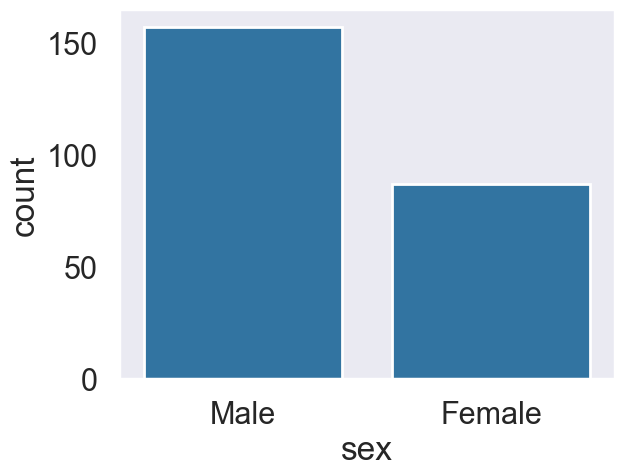

In [163]:
sns.set_context('poster')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

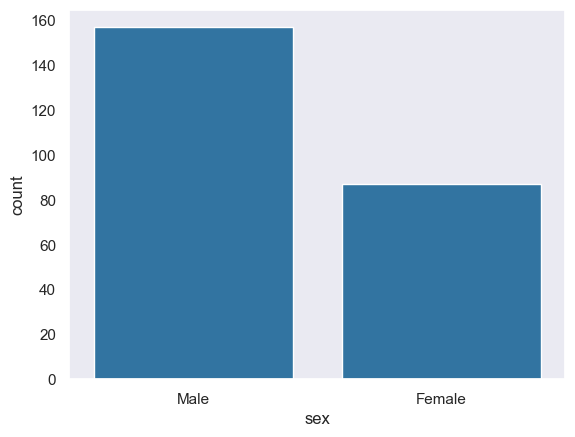

In [164]:
sns.set_context('notebook') #'notebook' is the default parameter
sns.countplot(x='sex',data=tips)

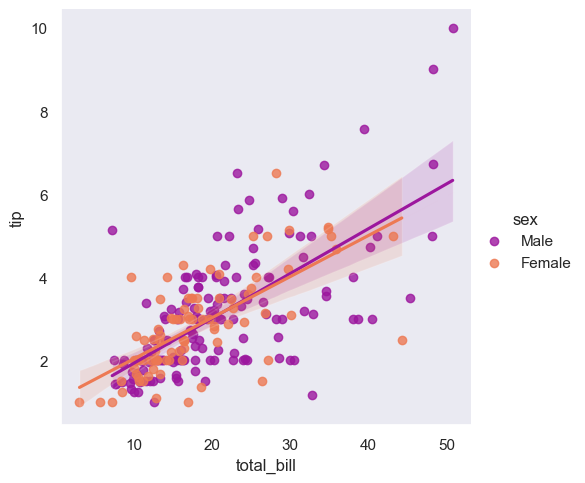

In [169]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='plasma')
# To find different palttes or cmap, we can go to matplotlib's color map page